In [1]:
from auto_control_tools import Model, FirstOrderModel, Controller
import auto_control_tools as act

In [2]:
tf = [[1], [1, 2]]
pid = (1, 1, 0)

In [3]:
model = Model(tf)
ki, kp, kd = pid
ctrl = Controller(model, ki=ki, kp=kp, kd=kd)

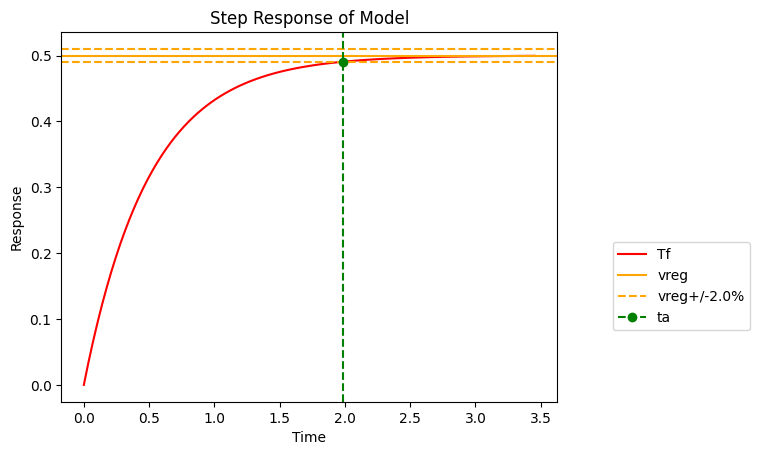

In [4]:
model.view.plot_model_graph()

In [5]:
model.view.print_model_data()

,RiseTime,SettlingTime,SettlingMin,SettlingMax,Overshoot,Undershoot,Peak,PeakTime,SteadyStateValue
0,1.081517,1.988596,0.45,0.5,0,0,0.4995,3.453878,0.5


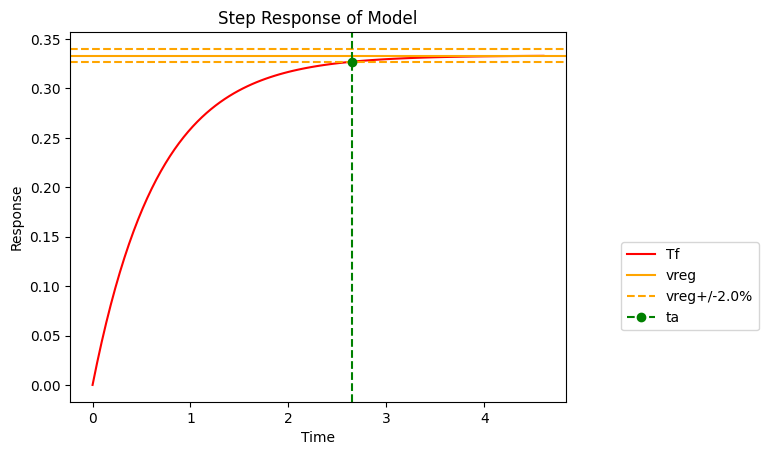

In [6]:
ctrl.view.plot_controller_graph()

In [7]:
ctrl.view.print_controller_data()

,RiseTime,SettlingTime,SettlingMin,SettlingMax,Overshoot,Undershoot,Peak,PeakTime,SteadyStateValue
0,1.48854,2.651462,0.302247,0.333333,0,0,0.333,4.60517,0.333333


In [8]:
import control

In [9]:
time, response = control.step_response(model.tf)

In [10]:

import matplotlib.pyplot as plt

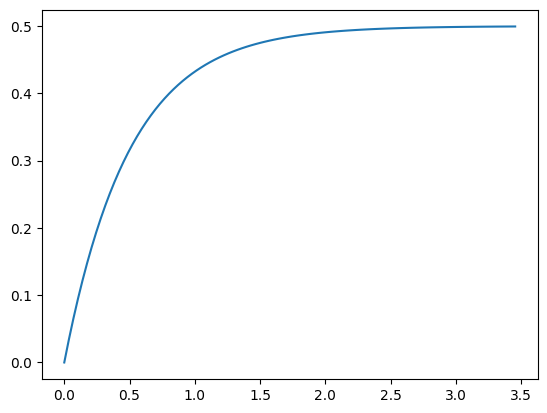

In [11]:
plt.plot(time, response)

In [12]:
control.step_info(model.tf)

{'RiseTime': 1.0815172406487183,
 'SettlingTime': 1.9885962166766757,
 'SettlingMin': 0.45,
 'SettlingMax': 0.5,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.49949999999999994,
 'PeakTime': 3.4538776394910684,
 'SteadyStateValue': 0.5}

2*exp(-4*s)/(3*s + 1)

TransferFunction(array([ 2.00000000e+00, -2.10000000e+02,  1.09725000e+04, -3.78551250e+05,
        9.65305688e+06, -1.93061138e+08,  3.13724348e+09, -4.23527870e+10,
        4.81762953e+11, -4.65704187e+12,  3.84205955e+13, -2.70690559e+14,
        1.62414335e+15, -8.24565087e+15,  3.50440162e+16, -1.22654057e+17,
        3.44964535e+17, -7.50805164e+17,  1.18877484e+18, -1.22005839e+18,
        6.10029195e+17]), array([3.00000000e+00, 3.16000000e+02, 1.65637500e+04, 5.73313125e+05,
       1.46688609e+07, 2.94418235e+08, 4.80239580e+09, 6.50978023e+10,
       7.43820822e+11, 7.22644429e+12, 5.99594141e+13, 4.25246136e+14,
       2.57156031e+15, 1.31805480e+16, 5.66888498e+16, 2.01503093e+17,
       5.78773830e+17, 1.29869001e+18, 2.15856485e+18, 2.42447501e+18,
       1.52507299e+18, 3.05014598e+17]))

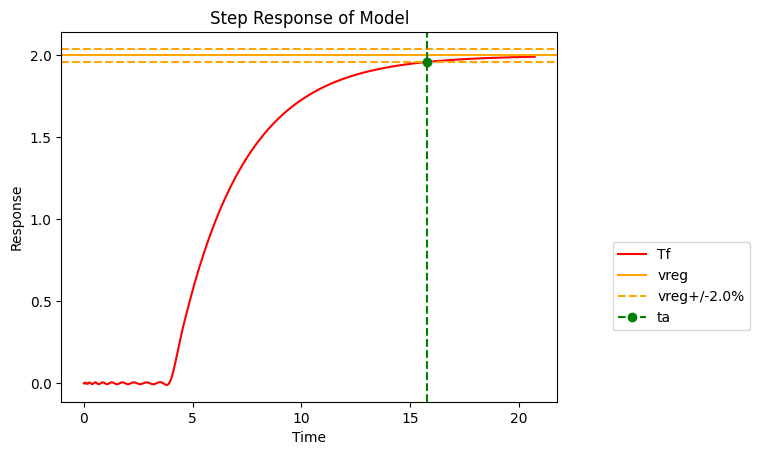

In [17]:
model = FirstOrderModel(2, 3, 4, 20)
model.view.print_tf()
display(model.tf)
model.view.plot_model_graph()

C:\Users\luiz\PycharmProjects\auto-control-tools\src\auto_control_tools\model\identification\base.py:93: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  return float(diff.idxmax()), float(max(diff[1:]))
C:\Users\luiz\PycharmProjects\auto-control-tools\src\auto_control_tools\model\identification\base.py:93: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  return float(diff.idxmax()), float(max(diff[1:]))


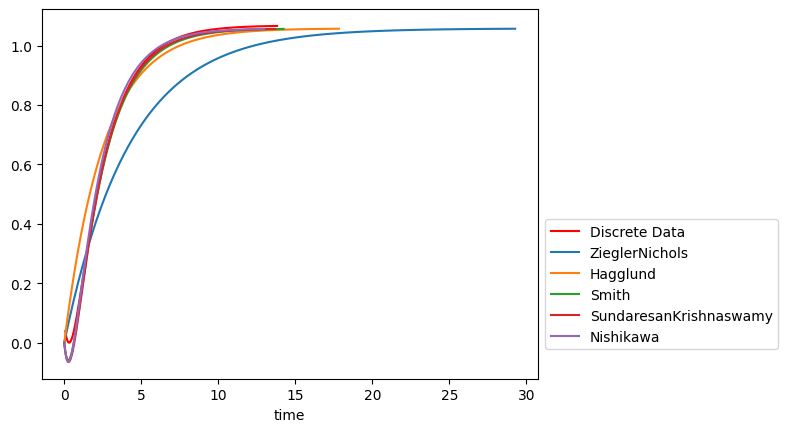

In [14]:
import os
pth = r'C:\Users\luiz\PycharmProjects\auto-control-tools\tests\manual'
identification_methods = {
    'ZieglerNichols': act.ZieglerNicholsModelIdentification,
    'Hagglund': act.HagglundModelIdentification,
    'Smith': act.SmithModelIdentification,
    'SundaresanKrishnaswamy': act.SundaresanKrishnaswamyModelIdentification,
    'Nishikawa': act.NishikawaModelIdentification,
}
models = {}
for name, method in identification_methods.items():
    models[name] = method.get_model(os.path.join(pth, 'data_input.csv'))

models['ZieglerNichols'].source_data.plot(label='Discrete Data', color='red')

for name, model in models.items():
    time, response = control.step_response(model.tf)
    plt.plot(time, response, label=name)

legend_kwargs = {
            'loc': 'upper center',
            'bbox_to_anchor': (1.25, 0.45)
        }
plt.legend(**legend_kwargs)
plt.show()